In [18]:
%matplotlib inline
import seaborn as sns; #sns.set(style="ticks", color_codes=True)
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import scipy
style.use('fast')

sns.set_style('ticks',{'legend.frameon':True} )
sns.set_palette('colorblind')
FIG_SIZE = (12, 3)
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['text.usetex'] = True

PALETTE_BASE = sns.color_palette('muted', n_colors=12)
blue=PALETTE_BASE[0]
green=PALETTE_BASE[1] 
red=PALETTE_BASE[2] 
purple=PALETTE_BASE[3]
version_colors=['orange',red, 'gray']

exclude_prefixes = ('@ryancavanaugh/pkg', 'all-packages-', 'cool-', 'neat-', 'wowdude-', 'npmdoc-', 'npmtest-', 'npm-ghost-',)
exclude_suffixes = ('-cdn',)
exclude_ghost = r'^ghost-\d+$'

# Considered period for the analysis
first_date="2010-12-20"
last_date="2018-03-12"
date_period = pd.to_datetime(first_date), pd.to_datetime(last_date)

# Load Data

In [3]:
tl_repo=pd.read_csv('../../../jsep2018/csv/repos/time_lag_repos.csv', 
                          sep=',', dtype=object, index_col=None,  error_bad_lines=False)
print(len(tl_repo))
tl_repo.head(2)

222400


,repo,kind,date,time_lag
0,0001vrn/simple-rss-ionic.git,Runtime,2016-12-25,667
1,000webhost/000webhost-sdk-js.git,Runtime,2017-07-18,566


In [5]:
tl_pack=pd.read_csv('../../../jsep2018/csv/packages/time_lag_packages.csv', 
                          sep=',', dtype=object, index_col=None,  error_bad_lines=False)
print(len(tl_pack))
tl_pack.head(2)

1218759


,package,version,kind,date,time_lag
0,0.0.0-development,1.0.0,runtime,2017-11-25,244.0
1,0.0.0-development,1.0.1,runtime,2017-11-26,244.0


In [13]:
tl_repo['time_lag'] = tl_repo['time_lag'].apply(float)
tl_pack['time_lag'] = tl_pack['time_lag'].apply(float)

tl_repo['date'] = pd.to_datetime(tl_repo['date'])
tl_pack['date'] = pd.to_datetime(tl_pack['date'])

In [14]:
size=[12,20,70]
df_tmp=(tl_repo.
     groupby(pd.Grouper(key='date', freq='1M'))['time_lag'].
     describe()[['mean', '25%', '50%', '75%']] 
    )
df_tmp.head()

,mean,25%,50%,75%
date,,,,
2011-01-31,16.000000,15.50,16.0,16.50
2011-02-28,15.000000,15.00,15.0,15.00
2011-03-31,22.000000,17.75,22.0,26.25
2011-04-30,42.428571,34.00,39.0,50.00
2011-05-31,61.000000,24.00,73.0,89.00


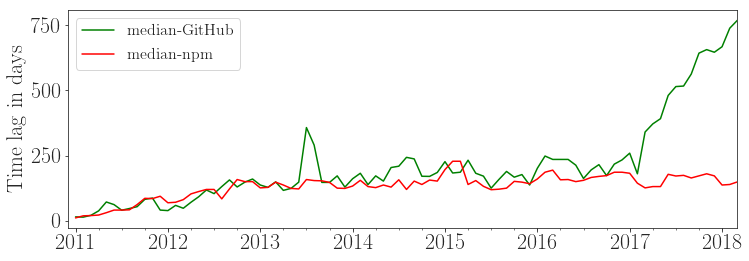

In [38]:
size=[12,20,70]
df_git=(tl_repo.
     groupby(pd.Grouper(key='date', freq='1M'))['time_lag'].
     describe()[['mean', '25%', '50%', '75%']] 
    )

df_npm=(tl_pack.
     groupby(pd.Grouper(key='date', freq='1M'))['time_lag'].
     describe()[['mean', '25%', '50%', '75%']] 
    )

color_git='green'
color_npm='red'

ax = df_git['50%'].rename('median-GitHub').plot(color=color_git)
ax = df_npm['50%'].rename('median-npm').plot(ax = ax, color=color_npm)

#ax=df_tmp['mean'].plot(style=':',color=color)
#ax.fill_between(df_tmp.index, df_tmp['25%'], df_tmp['75%'], alpha=0.2, color=color)

ax.set(
    xlabel='',
    ylabel='Time lag in days',
    xlim=date_period
)
ax.legend(loc='upper left',  prop={'size': 16, 'weight':'bold'})
ax.figure.set_size_inches(12,4)


NameError: name 'time_lag_max' is not defined

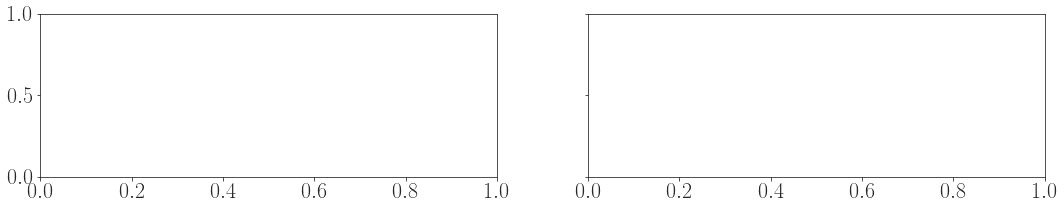

In [27]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True)
fig.set_size_inches(18,3)
time_lag_max['date']=pd.to_datetime(time_lag_max['date'])
for index, genre in enumerate(['Runtime','Development']):
    size=[12,20,70]
    df_=(time_lag_max.
         query('kind=="{}"'.format(genre)).
         groupby(pd.Grouper(key='date', freq='1M'))['time_lag'].
         describe()[['mean', '25%', '50%', '75%']] 
        )
    genre=genre.capitalize()

    if genre =="Runtime":
        color=green
    else:
        color=blue

    df_tmp=df_
    df_tmp['50%'].rename('median').plot(ax=axes[index], color=color)
    ax=df_tmp['mean'].plot(ax=axes[index],style=':',color=color)
    ax.fill_between(df_tmp.index, df_tmp['25%'], df_tmp['75%'], alpha=0.2, color=color)

    ax.set(
        xlabel='',
        ylabel='Time lag in days'.format(genre),
        title=genre,
        xlim=date_period
    )
    ax.legend(loc='upper left',  prop={'size': 16, 'weight':'bold'})
#fig.savefig('../../../../repositories/jsep18technicallag/figures/time_lag_repos.eps', bbox_inches='tight', facecolor='white')
